<!-- <div style='float:right'><img width=200 src="hse-logo.jpg" alt="HSE logo"></img></div> -->
<div style='float:left'><img width=400 src="python_logo.png" alt="Python"></img></div>

<div style='float:right'>

<h1 align='center'>Язык программирования Python</h1>

<h2 align='right'>Бобер Станислав Алексеевич</h2>
<h3 align='right'>Ст. преп. Департамента Прикладной Математики</h3>
<h3 align='right'>e-mail: sbober@hse.ru, stas.bober@gmail.com</h3>
</div>

# Семинар 4

Теоретическая часть: [Лекция 4](https://github.com/BoberSA/PythonCourse/blob/master/Lecture_4/Lecture_4.ipynb)

# Темы семинара:

### 0. Matplotlib

### Задание 0. Графики температур

Дан текстовый файл:
[Температура в Стокгольме более чем за 200 лет](https://github.com/jrjohansson/scientific-python-lectures/blob/master/stockholm_td_adj.dat)

Требуется:

Для заданного месяца отрисовать график средней, минимальной и максимальной по всем годам температуры (абсцисса - день, ордината - температура). Задать подписи к осям и название графика. Линии изобразить разными стилями и добавить легенду.


C:\Users\ische\Anaconda3\lib\site-packages\IPython\core\events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\ische\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


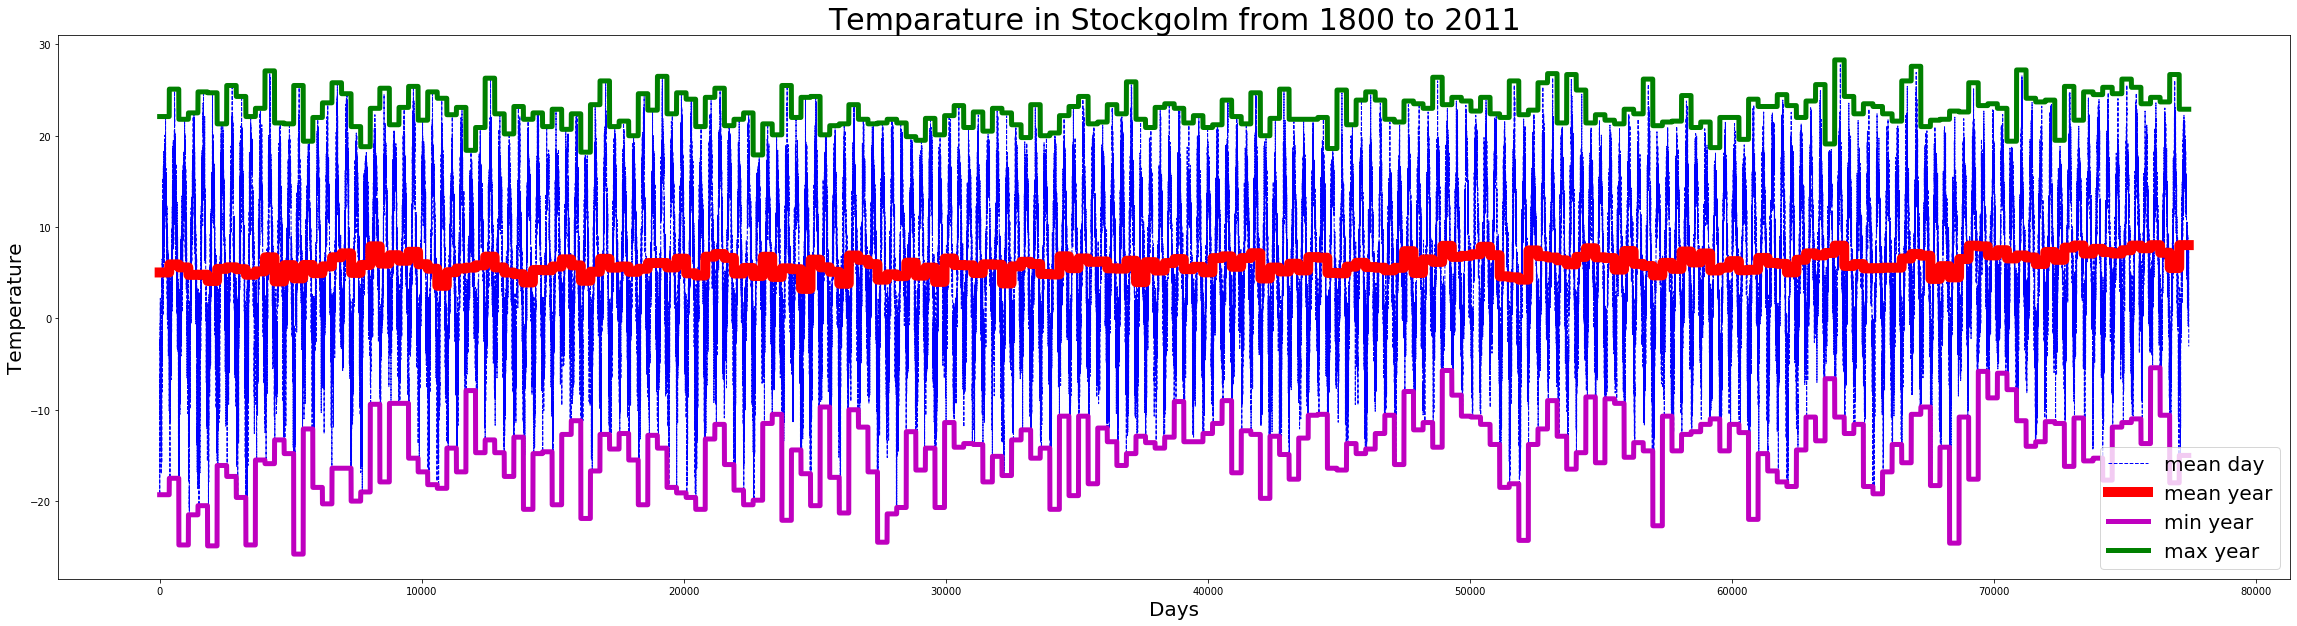

In [2]:
# подключение модуля и сокращение названия для удобства
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# для отображения статических графиков прямо в ноутбуке
%matplotlib inline

filename = 'stockholm_td_adj.dat.txt'

data = pd.read_csv(filename, header=None, delim_whitespace=True)
data.columns = ["year", "month", "day", "first", "second", "third", "IDK"]
del data['IDK']

group = data.groupby(["year"]).agg({'first': ['mean', 'min', 'max'], 'second': ['mean', 'min', 'max'], 'third': ['mean', 'min', 'max']})
group.columns = ['_'.join(col).strip() for col in group.columns.values]

groupby_dict = {"first_mean": "mean", 
               "second_mean": "mean", 
               "third_mean": "mean", 
               "year": "year" }
mean = group.groupby(groupby_dict, axis = 1).agg('mean')

groupby_dict = {"first_min": "min", 
               "second_min": "min", 
               "third_min": "min", 
               "year": "year" }
min_ = group.groupby(groupby_dict, axis = 1).agg('min')

groupby_dict = {"first_max": "max", 
               "second_max": "max", 
               "third_max": "max", 
               "year": "year" }
max_ = group.groupby(groupby_dict, axis = 1).agg('max')

groupby_dict = {"year": "year",
               "month": "month",
               "day":"day",
               "first": "t", 
               "second": "t", 
               "third": "t"}
data = data.groupby(groupby_dict, axis = 1).agg('mean')
data = data.join(mean, on='year').join(min_, on='year').join(max_, on='year')

fig = plt.figure(figsize=(40, 10))
ax = plt.gca()
plt.plot(data['t'], '--b', lw=1, label='mean day')
plt.plot(data['mean'], '-r', lw=10, label='mean year')
plt.plot(data['min'], '-m', lw=5, label='min year')
plt.plot(data['max'], '-g', lw=5, label='max year')

plt.legend(fontsize=20)
plt.xlabel('Days', fontsize=20)
plt.ylabel('Temperature', fontsize=20)
plt.title('Temparature in Stockgolm from 1800 to 2011', fontsize=30);


### Задание 1. Контурная карта

Изобразить контурную карту поверхности, заданной уравнением $z = |x|+|y|+sin^2(x+y)$ на области внутри круга радиусом 1.

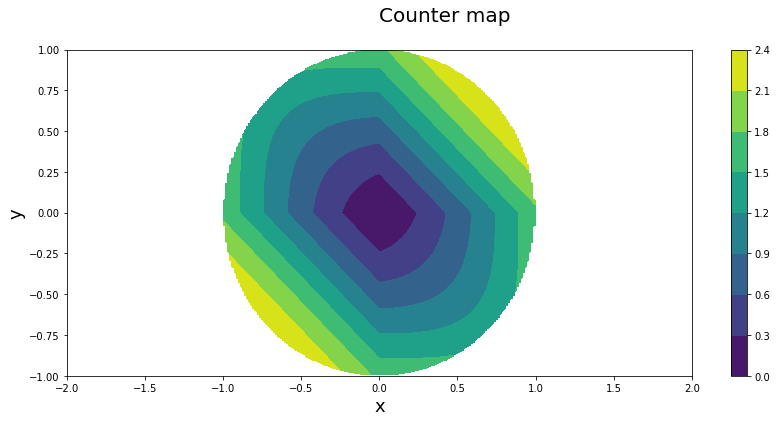

In [3]:


N = 300
x_start, x_end = -2.0, 2.0
y_start, y_end = -1.0, 1.0

x = np.linspace(x_start, x_end, N)
y = np.linspace(y_start, y_end, N)

x0, y0, radius = 0.0, 0.0, 1

x, y = np.meshgrid(x, y)
r = np.sqrt((x - x0)**2 + (y - y0)**2)

outside = r > radius
z = abs(x)+abs(y)+np.sin(x + y)**2
z[outside] = 0
d = np.ma.array(z, mask=outside)

fig = plt.figure(figsize=(14, 6))
cs = plt.contourf(x, y, d)
cbar = fig.colorbar(cs)
fig.suptitle("Counter map", fontsize=20);
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=18);